In [6]:
import math
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Dict, Tuple, Any, Optional, Union
from dataclasses import dataclass
from enum import Enum
import time
import random
from queue import Queue, PriorityQueue
import json

# Ejercicio 1 - L-Systems - Simulación de crecimiento de plantas

Desarrollar un simulador de crecimiento de plantas utilizando L-Systems para modelar patrones de crecimiento. El sistema debe simular diferentes especies de plantas, calcular métricas biológicas y visualizar la evolución del crecimiento.

Funcionalidades requeridas:
1. Sistema L-System base:
  - Axioma: cadena inicial que representa el estado embrionario
  - Reglas de reescritura: transformaciones que simulan crecimiento celular
  - Parámetros de crecimiento: ángulos de ramificación, longitudes de segmentos
  - Generaciones: aplicación iterativa de reglas de crecimiento

2. Modelos de plantas específicas:
  - Implementar al menos 3 tipos diferentes:
    - Helecho:
      - Axioma: "X"
      - Reglas: X → F+[[X]-X]-F[-FX]+X, F → FF
      - Ángulo: 25°
    - Árbol binario:
      - Axioma: "F"
      - Reglas: F → F[+F]F[-F]F
      - Ángulo: 30°
    - Planta trepadora:
      - Axioma: "F"
      - Reglas: F → F[+F[+F][-F]F]F[-F]
      - Ángulo: 22.5°

3. Cálculo de métricas biológicas:
  - Biomasa: basada en número de segmentos y ramificaciones
  - Área foliar: estimación del área de fotosíntesis
  - Número de ramas: conteo de estructuras ramificadas
  - Altura máxima: distancia vertical máxima alcanzada
  - Complejidad estructural: medida de diversidad morfológica

4. Interpretación geométrica:
  - Convertir símbolos L-System en coordenadas 2D
  - Símbolos: F (avanzar), + (girar izquierda), - (girar derecha)
  - Ramificación: [ (guardar estado), ] (restaurar estado)
  - Generación de puntos para visualización

5. Visualización y análisis:
  - Gráficos de la estructura de la planta
  - Evolución de métricas a través de generaciones
  - Comparación entre especies
  - Información biológica superpuesta

Outputs esperados:

Para cada generación:

Generación 1:
  📏 Longitud del código genético: 23 símbolos
  🍃 Biomasa estimada: 12.50 unidades  
  🌿 Área foliar: 5.75 m²
  🌳 Número de ramas: 8
  📐 Altura máxima: 3.20 m
  🔢 Complejidad estructural: 15.42

Información del modelo:

=== HELECHO BARNSLEY ===
Axioma inicial: X
Reglas de crecimiento: {'X': 'F+[[X]-X]-F[-FX]+X', 'F': 'FF'}
Ángulo de ramificación: 25.0°

Métricas finales:

📊 MÉTRICAS FINALES:
   Eficiencia de crecimiento: 3.12 u/gen
   Densidad foliar: 1.80 m²/m


In [7]:
@dataclass
class MetricasBiologicas:
    """Métricas biológicas de la planta"""
    biomasa: float
    area_foliar: float
    numero_ramas: int
    altura_maxima: float
    complejidad: float

In [8]:
class PlantaLSystem:
    """Sistema L-System avanzado para simulación de plantas"""

    def __init__(self, nombre: str, axioma: str, reglas: Dict[str, str],
                 angulo: float, longitud_inicial: float = 1.0):
        self.nombre = nombre
        self.axioma = axioma
        self.reglas = reglas
        self.angulo = math.radians(angulo)
        self.longitud_inicial = longitud_inicial
        self.generacion_actual = axioma
        self.numero_generacion = 0
        self.historico_generaciones = [axioma]

    def crecer(self, generaciones: int) -> List[str]:
        """Simula el crecimiento durante n generaciones"""
        print(f"\n🌱 SIMULANDO CRECIMIENTO DE {self.nombre.upper()}")
        print("=" * 60)

        for gen in range(generaciones):
            nueva_generacion = ""

            # Aplicar reglas de crecimiento
            for simbolo in self.generacion_actual:
                if simbolo in self.reglas:
                    nueva_generacion += self.reglas[simbolo]
                else:
                    nueva_generacion += simbolo

            self.generacion_actual = nueva_generacion
            self.numero_generacion += 1
            self.historico_generaciones.append(nueva_generacion)

            # Mostrar estadísticas de crecimiento
            metricas = self.calcular_metricas_biologicas(nueva_generacion)
            print(f"Generación {gen + 1}:")
            print(f"  📏 Longitud del código genético: {len(nueva_generacion)} símbolos")
            print(f"  🍃 Biomasa estimada: {metricas.biomasa:.2f} unidades")
            print(f"  🌿 Área foliar: {metricas.area_foliar:.2f} m²")
            print(f"  🌳 Número de ramas: {metricas.numero_ramas}")
            print(f"  📐 Altura máxima: {metricas.altura_maxima:.2f} m")
            print(f"  🔢 Complejidad estructural: {metricas.complejidad:.2f}")
            print()

        return self.historico_generaciones

    def calcular_metricas_biologicas(self, codigo_genetico: str) -> MetricasBiologicas:
        """Calcula métricas biológicas basadas en el código genético L-System"""

        # Contar elementos estructurales
        num_ramas = codigo_genetico.count('F') + codigo_genetico.count('X') + codigo_genetico.count('Y')
        num_hojas = codigo_genetico.count('[') + codigo_genetico.count('L')
        num_nodos = codigo_genetico.count('+') + codigo_genetico.count('-')

        # Calcular métricas derivadas
        biomasa = num_ramas * 0.5 + num_hojas * 0.1 + num_nodos * 0.02
        area_foliar = num_hojas * 0.25 + num_ramas * 0.05
        altura_maxima = self._calcular_altura_maxima(codigo_genetico)
        complejidad = len(set(codigo_genetico)) * math.log(len(codigo_genetico) + 1)

        return MetricasBiologicas(
            biomasa=biomasa,
            area_foliar=area_foliar,
            numero_ramas=num_ramas,
            altura_maxima=altura_maxima,
            complejidad=complejidad
        )

    def _calcular_altura_maxima(self, codigo: str) -> float:
        """Simula el cálculo de altura máxima basado en la estructura"""
        altura = 0.0
        altura_maxima = 0.0
        stack = []

        for simbolo in codigo:
            if simbolo == 'F':
                altura += self.longitud_inicial
                altura_maxima = max(altura_maxima, altura)
            elif simbolo == '[':
                stack.append(altura)
            elif simbolo == ']':
                if stack:
                    altura = stack.pop()

        return altura_maxima

    def interpretar_geometricamente(self, codigo: str) -> List[Tuple[Optional[float], Optional[float]]]:
        """Convierte código L-System en coordenadas geométricas"""
        puntos = [(0.0, 0.0)]
        x, y = 0.0, 0.0
        angulo = math.pi / 2  # Iniciar apuntando hacia arriba
        stack = []

        for simbolo in codigo:
            if simbolo in ['F', 'X', 'Y']:  # Avanzar dibujando
                nuevo_x = x + self.longitud_inicial * math.cos(angulo)
                nuevo_y = y + self.longitud_inicial * math.sin(angulo)
                puntos.append((nuevo_x, nuevo_y))
                x, y = nuevo_x, nuevo_y

            elif simbolo == '+':  # Girar a la izquierda
                angulo += self.angulo

            elif simbolo == '-':  # Girar a la derecha
                angulo -= self.angulo

            elif simbolo == '[':  # Guardar estado (iniciar rama)
                stack.append((x, y, angulo))

            elif simbolo == ']':  # Restaurar estado (terminar rama)
                if stack:
                    x, y, angulo = stack.pop()
                    puntos.append((None, None))  # Levantar "lápiz"
                    puntos.append((x, y))  # Nuevo punto de inicio

        return puntos

    def visualizar(self, generacion: int = -1, titulo_personalizado: str = ""):
        """Visualiza una generación específica de la planta"""
        if generacion == -1:
            generacion = len(self.historico_generaciones) - 1

        codigo = self.historico_generaciones[generacion]
        puntos = self.interpretar_geometricamente(codigo)

        plt.figure(figsize=(12, 10))

        # Dibujar la planta
        segmentos_x, segmentos_y = [], []

        for punto in puntos:
            if punto[0] is not None:
                segmentos_x.append(punto[0])
                segmentos_y.append(punto[1])
            else:
                if segmentos_x:
                    plt.plot(segmentos_x, segmentos_y, 'green', linewidth=1.5, alpha=0.8)
                segmentos_x, segmentos_y = [], []

        if segmentos_x:
            plt.plot(segmentos_x, segmentos_y, 'green', linewidth=1.5, alpha=0.8)

        # Configurar visualización
        plt.axis('equal')
        plt.grid(True, alpha=0.3)
        titulo = titulo_personalizado or f'{self.nombre} - Generación {generacion}'
        plt.title(titulo, fontsize=14, fontweight='bold')
        plt.xlabel('Posición X (metros)')
        plt.ylabel('Posición Y (metros)')

        # Agregar información biológica
        metricas = self.calcular_metricas_biologicas(codigo)
        info_text = f'Biomasa: {metricas.biomasa:.1f} u\nÁrea foliar: {metricas.area_foliar:.1f} m²\nRamas: {metricas.numero_ramas}'
        plt.text(0.02, 0.98, info_text, transform=plt.gca().transAxes,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

        plt.tight_layout()
        plt.show()

🌿 SIMULADOR DE CRECIMIENTO DE PLANTAS USANDO L-SYSTEMS

==================== PLANTA 1: HELECHO BARNSLEY ====================
Axioma inicial: X
Reglas de crecimiento: {'X': 'F+[[X]-X]-F[-FX]+X', 'F': 'FF'}
Ángulo de ramificación: 25.0°

🌱 SIMULANDO CRECIMIENTO DE HELECHO BARNSLEY
Generación 1:
  📏 Longitud del código genético: 18 símbolos
  🍃 Biomasa estimada: 3.90 unidades
  🌿 Área foliar: 1.10 m²
  🌳 Número de ramas: 7
  📐 Altura máxima: 1.50 m
  🔢 Complejidad estructural: 17.67

Generación 2:
  📏 Longitud del código genético: 89 símbolos
  🍃 Biomasa estimada: 19.00 unidades
  🌿 Área foliar: 5.45 m²
  🌳 Número de ramas: 34
  📐 Altura máxima: 4.50 m
  🔢 Complejidad estructural: 27.00

Generación 3:
  📏 Longitud del código genético: 379 símbolos
  🍃 Biomasa estimada: 82.40 unidades
  🌿 Área foliar: 23.15 m²
  🌳 Número de ramas: 148
  📐 Altura máxima: 10.50 m
  🔢 Complejidad estructural: 35.64

Generación 4:
  📏 Longitud del código genético: 1551 símbolos
  🍃 Biomasa estimada: 342.00 uni

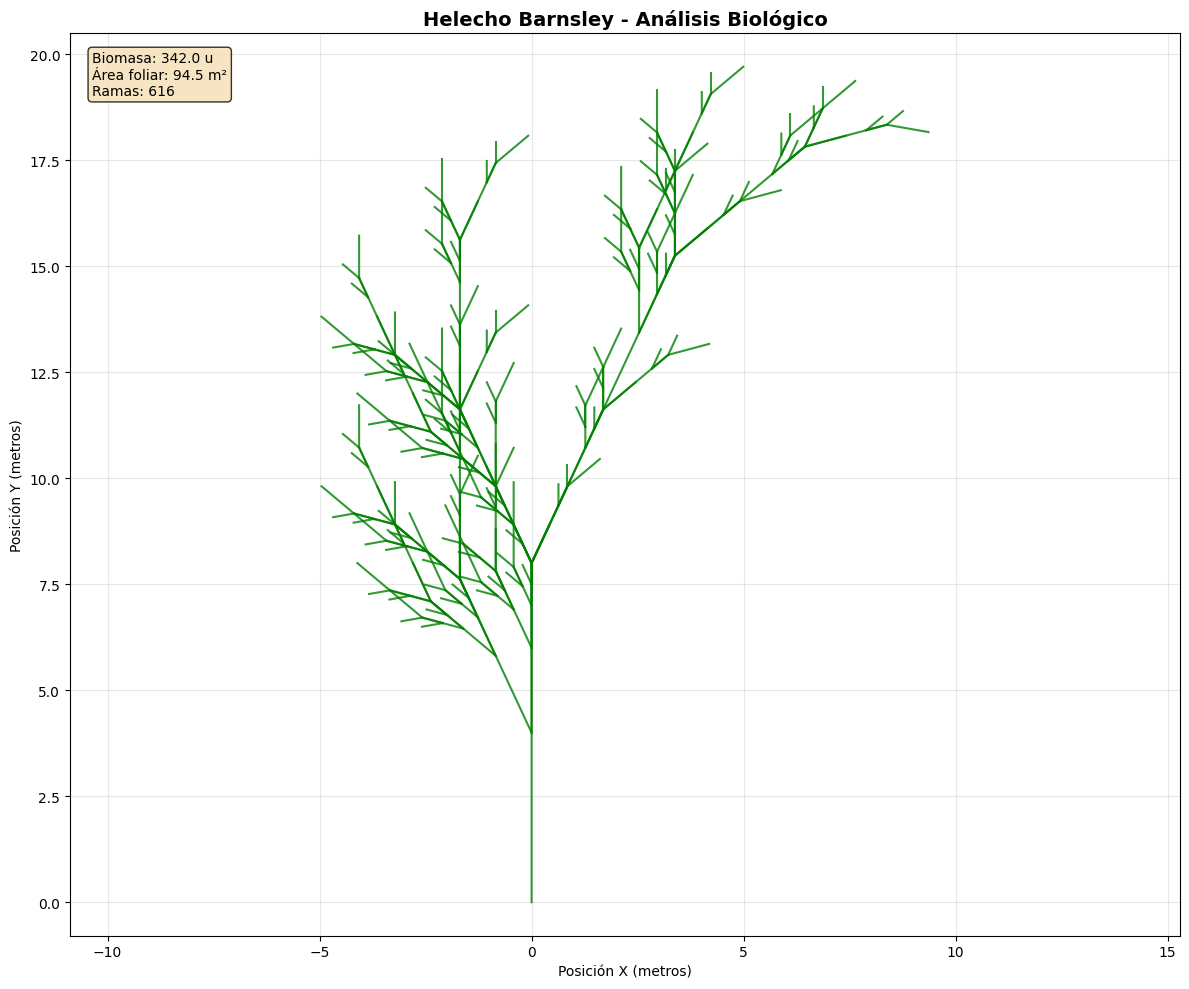

📊 MÉTRICAS FINALES:
   Eficiencia de crecimiento: 85.50 u/gen
   Densidad foliar: 4.20 m²/m
------------------------------------------------------------------------------------------------------

==================== PLANTA 2: ÁRBOL BINARIO ====================
Axioma inicial: F
Reglas de crecimiento: {'F': 'F[+F]F[-F]F'}
Ángulo de ramificación: 30.0°

🌱 SIMULANDO CRECIMIENTO DE ÁRBOL BINARIO
Generación 1:
  📏 Longitud del código genético: 11 símbolos
  🍃 Biomasa estimada: 2.74 unidades
  🌿 Área foliar: 0.75 m²
  🌳 Número de ramas: 5
  📐 Altura máxima: 3.00 m
  🔢 Complejidad estructural: 12.42

Generación 2:
  📏 Longitud del código genético: 61 símbolos
  🍃 Biomasa estimada: 13.94 unidades
  🌿 Área foliar: 4.25 m²
  🌳 Número de ramas: 25
  📐 Altura máxima: 9.00 m
  🔢 Complejidad estructural: 20.64

Generación 3:
  📏 Longitud del código genético: 311 símbolos
  🍃 Biomasa estimada: 69.94 unidades
  🌿 Área foliar: 21.75 m²
  🌳 Número de ramas: 125
  📐 Altura máxima: 27.00 m
  🔢 Complejida

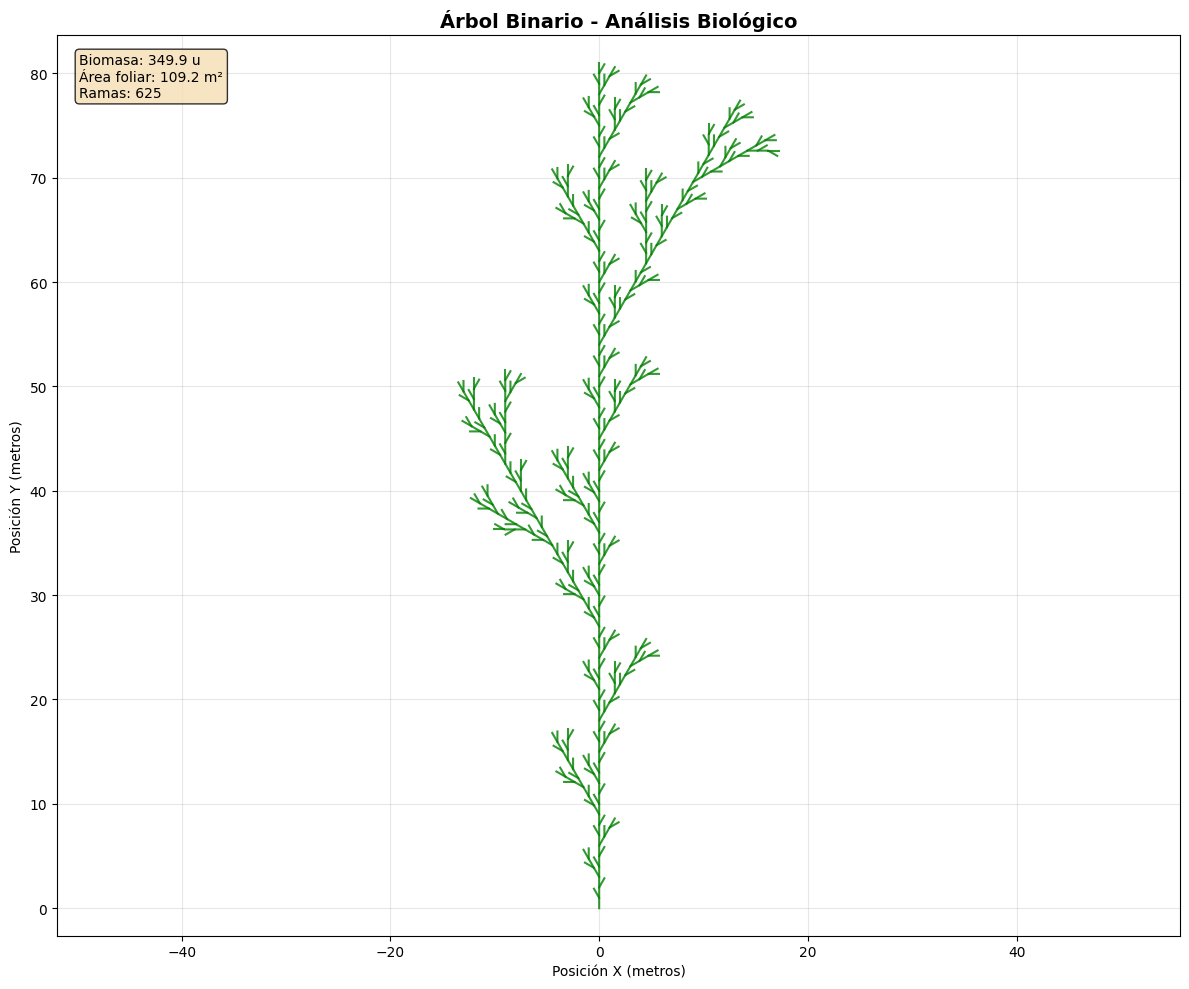

📊 MÉTRICAS FINALES:
   Eficiencia de crecimiento: 87.48 u/gen
   Densidad foliar: 1.35 m²/m
------------------------------------------------------------------------------------------------------

==================== PLANTA 3: PLANTA TREPADORA ====================
Axioma inicial: F
Reglas de crecimiento: {'F': 'F[+F[+F][-F]F]F[-F]'}
Ángulo de ramificación: 22.5°

🌱 SIMULANDO CRECIMIENTO DE PLANTA TREPADORA
Generación 1:
  📏 Longitud del código genético: 19 símbolos
  🍃 Biomasa estimada: 3.98 unidades
  🌿 Área foliar: 1.35 m²
  🌳 Número de ramas: 7
  📐 Altura máxima: 2.40 m
  🔢 Complejidad estructural: 14.98

Generación 2:
  📏 Longitud del código genético: 145 símbolos
  🍃 Biomasa estimada: 28.34 unidades
  🌿 Área foliar: 10.45 m²
  🌳 Número de ramas: 49
  📐 Altura máxima: 5.60 m
  🔢 Complejidad estructural: 24.92

Generación 3:
  📏 Longitud del código genético: 1027 símbolos
  🍃 Biomasa estimada: 198.86 unidades
  🌿 Área foliar: 74.15 m²
  🌳 Número de ramas: 343
  📐 Altura máxima: 12.0

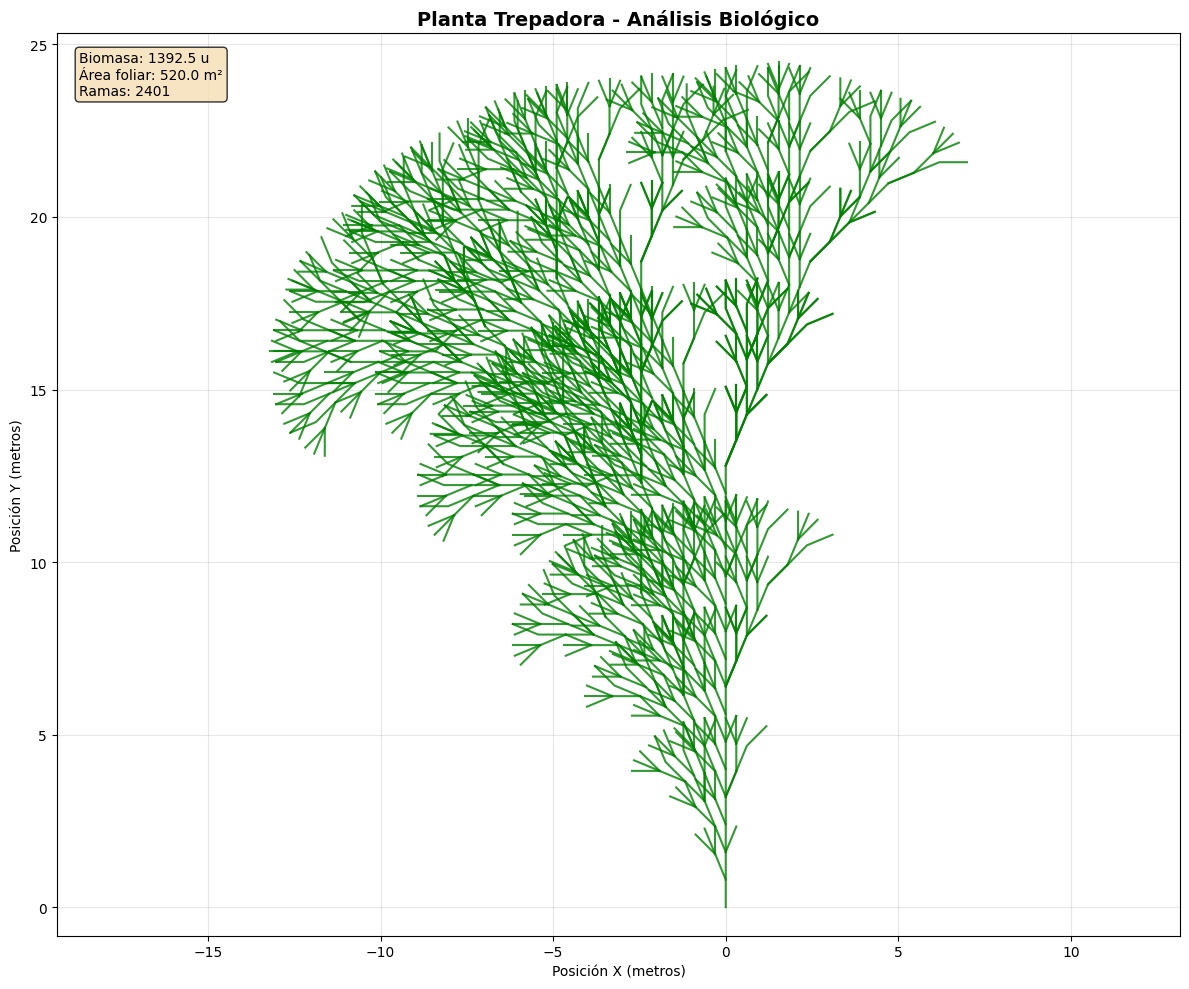

📊 MÉTRICAS FINALES:
   Eficiencia de crecimiento: 348.12 u/gen
   Densidad foliar: 20.97 m²/m
------------------------------------------------------------------------------------------------------


In [9]:
def ejemplo_plantas_completo():
    """Ejemplo completo de simulación de diferentes tipos de plantas"""

    print("🌿 SIMULADOR DE CRECIMIENTO DE PLANTAS USANDO L-SYSTEMS")
    print("=" * 80)

    # 1. HELECHO (Estructura fractal compleja)
    helecho = PlantaLSystem(
        nombre="Helecho Barnsley",
        axioma="X",
        reglas={
            "X": "F+[[X]-X]-F[-FX]+X",
            "F": "FF"
        },
        angulo=25.0,
        longitud_inicial=0.5
    )

    # 2. ÁRBOL BINARIO (Ramificación simple)
    arbol = PlantaLSystem(
        nombre="Árbol Binario",
        axioma="F",
        reglas={
            "F": "F[+F]F[-F]F"
        },
        angulo=30.0,
        longitud_inicial=1.0
    )

    # 3. PLANTA TREPADORA (Crecimiento en espiral)
    trepadora = PlantaLSystem(
        nombre="Planta Trepadora",
        axioma="F",
        reglas={
            "F": "F[+F[+F][-F]F]F[-F]"
        },
        angulo=22.5,
        longitud_inicial=0.8
    )

    plantas = [helecho, arbol, trepadora]

    # Simular crecimiento de cada planta
    generaciones = 4

    for i, planta in enumerate(plantas, 1):
        print(f"\n{'='*20} PLANTA {i}: {planta.nombre.upper()} {'='*20}")

        # Información del modelo genético
        print(f"Axioma inicial: {planta.axioma}")
        print(f"Reglas de crecimiento: {planta.reglas}")
        print(f"Ángulo de ramificación: {math.degrees(planta.angulo):.1f}°")

        # Simular crecimiento
        historico = planta.crecer(generaciones)

        # Visualizar resultado final
        planta.visualizar(titulo_personalizado=f"{planta.nombre} - Análisis Biológico")

        # Análisis comparativo
        metricas_final = planta.calcular_metricas_biologicas(historico[-1])
        print(f"📊 MÉTRICAS FINALES:")
        print(f"   Eficiencia de crecimiento: {metricas_final.biomasa/generaciones:.2f} u/gen")
        print(f"   Densidad foliar: {metricas_final.area_foliar/metricas_final.altura_maxima:.2f} m²/m")
        print("------------------------------------------------------------------------------------------------------")
        #input(f"\nPresiona Enter para continuar con la siguiente planta...")

ejemplo_plantas_completo()

# Ejercicio 2 - Modelado de protocolos de comunicación

Desarrollar un simulador de protocolo de comunicación IoT basado en MQTT simplificado, utilizando gramáticas formales y máquinas de estados para validar secuencias de mensajes, detectar errores de protocolo y generar logs de auditoría automáticamente.

1. Protocolo simplificado:
- CONNECT: establecer conexión
- CONNACK: confirmar conexión
- PUBLISH: publicar mensaje
- PUBACK: confirmar publicación
- SUBSCRIBE: suscribirse a un tópico
- SUBACK: confirmar suscripción
- PING: Verificar que la conexión está activa
- PONG: Responder a ping (conexión activa)
- DISCONNECT: cerrar conexión
- ERROR: Indicar error en el protocolo

2. Estados Válidos:
- DESCONECTADO: Estado inicial, sin conexión
- CONECTANDO: Conexión en proceso de establecimiento
- CONECTADO: Conexión establecida, puede operar
- SUSCRITO: Conectado y suscripto a tópicos
- ERROR_PROTOCOLO: Estado de error por violación del protocolo

3. Definir reglas de transición válidas:

DESCONECTADO → [CONNECT] → CONECTANDO

CONECTANDO → [CONNACK] → CONECTADO  

CONECTADO → [SUBSCRIBE] → SUSCRITO

CONECTADO → [PUBLISH, PING, DISCONNECT] → CONECTADO/DESCONECTADO

SUSCRITO → [PUBLISH, SUBACK, PING, DISCONNECT] → SUSCRITO/DESCONECTADO

4. Validador de Protocolo:
  - Verificar secuencias de mensajes según gramática
  - Detectar violaciones del protocolo
  - Mantener estado actual de cada dispositivo
  - Generar mensajes de error descriptivos

5. Simulador de Dispositivos IoT
  - Simular dispositivos que siguen/violan el protocolo
  - Manejo de mensajes pendientes de respuesta
  - Log detallado de todas las comunicaciones
  - Generación de reportes de auditoría

OUTPUTS ESPERADOS:

Comunicación normal:

📤 [sensor_temp_01] CONNECT: Mensaje válido. Transición: DESCONECTADO -> CONECTANDO

📥 [sensor_temp_01] Recibido CONNACK (respuesta a seq: 0)

📤 [sensor_temp_01] SUBSCRIBE: Mensaje válido. Transición: CONECTADO -> SUSCRITO

📤 [sensor_temp_01] PUBLISH: Mensaje válido. Transición: SUSCRITO -> SUSCRITO

Estado del dispositivo:

📱 ESTADO DE sensor_temp_01:
   Estado actual: CONECTADO
   Mensajes enviados: 5
   Respuestas pendientes: 2
   Esperando respuestas para:
     - Seq 2: PUBACK
     - Seq 4: PONG

Errores de protocolo:

❌ ERROR: Mensaje PUBLISH no válido en estado DESCONECTADO.
Válidos: ['CONNECT']

Log de auditoría:

📋 LOG DE AUDITORÍA - sensor_temp_01
============================================================
[14:23:15] 📤 ENVIÓ CONNECT | Payload: {"version": "3.1.1"} | DESCONECTADO -> CONECTANDO

[14:23:16] 📥 RECIBIÓ CONNACK | Respuesta a seq: 0

[14:23:17] 📤 ENVIÓ PUBLISH | Payload: {"topic": "temp", "value": 25} | CONECTADO -> CONECTADO

[14:23:18] ❌ ERROR: Mensaje CONNACK no válido en estado CONECTADO

Escenarios de simulacion:

Comunicación normal:
1. Dispositivo envía CONNECT
2. Recibe CONNACK  
3. Envía SUBSCRIBE a tópico
4. Recibe SUBACK
5. Publica datos periódicamente con PUBLISH/PUBACK
6. Envía PING/PONG para keep-alive
7. Finalmente envía DISCONNECT

Errores comunes:
1. Intentar PUBLISH sin CONNECT previo
2. Enviar CONNACK desde cliente (solo servidor puede)
3. DISCONNECT sin estar conectado
4. Doble CONNECT sin DISCONNECT intermedio

Respuestas perdidas:
1. Enviar CONNECT pero no recibir CONNACK (timeout)
2. PUBLISH sin recibir PUBACK correspondiente
3. Acumulación de mensajes pendientes

In [10]:
class TipoMensaje(Enum):
    CONNECT = "CONNECT"
    CONNACK = "CONNACK"
    PUBLISH = "PUBLISH"
    PUBACK = "PUBACK"
    SUBSCRIBE = "SUBSCRIBE"
    SUBACK = "SUBACK"
    PING = "PING"
    PONG = "PONG"
    DISCONNECT = "DISCONNECT"
    ERROR = "ERROR"

In [11]:
@dataclass
class MensajeProtocolo:
    """Representa un mensaje del protocolo"""
    tipo: TipoMensaje
    cliente_id: str
    payload: Dict[str, Any]
    timestamp: float
    secuencia: int

In [12]:
class EstadoConexion(Enum):
    DESCONECTADO = "DESCONECTADO"
    CONECTANDO = "CONECTANDO"
    CONECTADO = "CONECTADO"
    SUSCRITO = "SUSCRITO"
    ERROR_PROTOCOLO = "ERROR_PROTOCOLO"

In [13]:
class ValidadorProtocolo:
    """Validador de protocolo usando gramática formal"""

    def __init__(self):
        # Definir gramática del protocolo MQTT simplificado
        self.gramatica_estados = {
            # Estado inicial -> Estados válidos siguientes
            EstadoConexion.DESCONECTADO: [TipoMensaje.CONNECT],
            EstadoConexion.CONECTANDO: [TipoMensaje.CONNACK, TipoMensaje.ERROR],
            EstadoConexion.CONECTADO: [
                TipoMensaje.PUBLISH, TipoMensaje.SUBSCRIBE,
                TipoMensaje.PING, TipoMensaje.DISCONNECT
            ],
            EstadoConexion.SUSCRITO: [
                TipoMensaje.PUBLISH, TipoMensaje.SUBACK,
                TipoMensaje.PING, TipoMensaje.DISCONNECT
            ]
        }

        # Transiciones de estado
        self.transiciones = {
            (EstadoConexion.DESCONECTADO, TipoMensaje.CONNECT): EstadoConexion.CONECTANDO,
            (EstadoConexion.CONECTANDO, TipoMensaje.CONNACK): EstadoConexion.CONECTADO,
            (EstadoConexion.CONECTADO, TipoMensaje.SUBSCRIBE): EstadoConexion.SUSCRITO,
            (EstadoConexion.SUSCRITO, TipoMensaje.SUBACK): EstadoConexion.SUSCRITO,
            (EstadoConexion.CONECTADO, TipoMensaje.DISCONNECT): EstadoConexion.DESCONECTADO,
            (EstadoConexion.SUSCRITO, TipoMensaje.DISCONNECT): EstadoConexion.DESCONECTADO,
        }

        # Mensajes que requieren respuesta
        self.requieren_respuesta = {
            TipoMensaje.CONNECT: TipoMensaje.CONNACK,
            TipoMensaje.PUBLISH: TipoMensaje.PUBACK,
            TipoMensaje.SUBSCRIBE: TipoMensaje.SUBACK,
            TipoMensaje.PING: TipoMensaje.PONG
        }

    def validar_mensaje(self, estado_actual: EstadoConexion,
                       mensaje: TipoMensaje) -> Tuple[bool, str, EstadoConexion]:
        """Valida si un mensaje es válido en el estado actual"""

        if estado_actual not in self.gramatica_estados:
            return False, f"Estado desconocido: {estado_actual}", EstadoConexion.ERROR_PROTOCOLO

        mensajes_validos = self.gramatica_estados[estado_actual]

        if mensaje not in mensajes_validos:
            error_msg = f"Mensaje {mensaje.value} no válido en estado {estado_actual.value}. Válidos: {[m.value for m in mensajes_validos]}"
            return False, error_msg, EstadoConexion.ERROR_PROTOCOLO

        # Calcular nuevo estado
        transicion_key = (estado_actual, mensaje)
        if transicion_key in self.transiciones:
            nuevo_estado = self.transiciones[transicion_key]
        else:
            nuevo_estado = estado_actual  # Mantener estado actual

        return True, f"Mensaje válido. Transición: {estado_actual.value} -> {nuevo_estado.value}", nuevo_estado

class SimuladorDispositivo:
    """Simula un dispositivo IoT que sigue el protocolo"""

    def __init__(self, cliente_id: str):
        self.cliente_id = cliente_id
        self.estado = EstadoConexion.DESCONECTADO
        self.validador = ValidadorProtocolo()
        self.log_mensajes = []
        self.secuencia_contador = 0
        self.mensajes_pendientes = []  # Mensajes que esperan respuesta

    def enviar_mensaje(self, tipo_mensaje: TipoMensaje,
                      payload: Dict[str, Any] = None) -> Tuple[bool, str]:
        """Envía un mensaje siguiendo el protocolo"""

        if payload is None:
            payload = {}

        # Validar mensaje con gramática
        valido, mensaje_error, nuevo_estado = self.validador.validar_mensaje(
            self.estado, tipo_mensaje
        )

        if not valido:
            self.log_mensajes.append({
                'timestamp': time.time(),
                'tipo': 'ERROR_PROTOCOLO',
                'mensaje': mensaje_error,
                'estado_antes': self.estado.value,
                'estado_despues': EstadoConexion.ERROR_PROTOCOLO.value
            })
            self.estado = EstadoConexion.ERROR_PROTOCOLO
            return False, mensaje_error

        # Crear mensaje
        mensaje = MensajeProtocolo(
            tipo=tipo_mensaje,
            cliente_id=self.cliente_id,
            payload=payload,
            timestamp=time.time(),
            secuencia=self.secuencia_contador
        )
        self.secuencia_contador += 1

        # Actualizar estado
        estado_anterior = self.estado
        self.estado = nuevo_estado

        # Registrar en log
        self.log_mensajes.append({
            'timestamp': mensaje.timestamp,
            'tipo': 'ENVIADO',
            'mensaje_tipo': tipo_mensaje.value,
            'payload': payload,
            'estado_antes': estado_anterior.value,
            'estado_despues': self.estado.value,
            'secuencia': mensaje.secuencia
        })

        # Si requiere respuesta, agregarlo a pendientes
        if tipo_mensaje in self.validador.requieren_respuesta:
            self.mensajes_pendientes.append({
                'mensaje_original': mensaje,
                'respuesta_esperada': self.validador.requieren_respuesta[tipo_mensaje]
            })

        print(f"📤 [{self.cliente_id}] {tipo_mensaje.value}: {mensaje_error}")
        return True, f"Mensaje enviado exitosamente. {mensaje_error}"

    def recibir_respuesta(self, tipo_respuesta: TipoMensaje) -> bool:
        """Procesa una respuesta recibida"""

        # Buscar mensaje pendiente que corresponda a esta respuesta
        for i, pendiente in enumerate(self.mensajes_pendientes):
            if pendiente['respuesta_esperada'] == tipo_respuesta:
                # Respuesta encontrada
                mensaje_original = pendiente['mensaje_original']
                del self.mensajes_pendientes[i]

                self.log_mensajes.append({
                    'timestamp': time.time(),
                    'tipo': 'RECIBIDO',
                    'mensaje_tipo': tipo_respuesta.value,
                    'respuesta_a_secuencia': mensaje_original.secuencia,
                    'estado': self.estado.value
                })

                print(f"📥 [{self.cliente_id}] Recibido {tipo_respuesta.value} (respuesta a seq: {mensaje_original.secuencia})")
                return True

        print(f"⚠️  [{self.cliente_id}] Respuesta {tipo_respuesta.value} inesperada o duplicada")
        return False

    def mostrar_estado(self):
        """Muestra el estado actual del dispositivo"""
        print(f"\n📱 ESTADO DE {self.cliente_id}:")
        print(f"   Estado actual: {self.estado.value}")
        print(f"   Mensajes enviados: {self.secuencia_contador}")
        print(f"   Respuestas pendientes: {len(self.mensajes_pendientes)}")

        if self.mensajes_pendientes:
            print("   Esperando respuestas para:")
            for pendiente in self.mensajes_pendientes:
                print(f"     - Seq {pendiente['mensaje_original'].secuencia}: {pendiente['respuesta_esperada'].value}")

    def generar_log_auditoria(self) -> str:
        """Genera log detallado para auditoría"""
        log_texto = f"\n📋 LOG DE AUDITORÍA - {self.cliente_id}\n"
        log_texto += "=" * 60 + "\n"

        for entrada in self.log_mensajes:
            timestamp = time.strftime('%H:%M:%S', time.localtime(entrada['timestamp']))
            log_texto += f"[{timestamp}] "

            if entrada['tipo'] == 'ERROR_PROTOCOLO':
                log_texto += f"❌ ERROR: {entrada['mensaje']}\n"
            elif entrada['tipo'] == 'ENVIADO':
                log_texto += f"📤 ENVIÓ {entrada['mensaje_tipo']}"
                if entrada.get('payload'):
                    log_texto += f" | Payload: {entrada['payload']}"
                log_texto += f" | {entrada['estado_antes']} -> {entrada['estado_despues']}\n"
            elif entrada['tipo'] == 'RECIBIDO':
                log_texto += f"📥 RECIBIÓ {entrada['mensaje_tipo']}"
                if entrada.get('respuesta_a_secuencia') is not None:
                    log_texto += f" | Respuesta a seq: {entrada['respuesta_a_secuencia']}"
                log_texto += "\n"

        return log_texto

In [14]:
def ejemplo_protocolo_iot():
    """Ejemplo completo de simulación de protocolo IoT"""

    print("📡 SIMULADOR DE PROTOCOLO IoT (MQTT SIMPLIFICADO)")
    print("=" * 80)

    # Crear dispositivos
    sensor_temperatura = SimuladorDispositivo("sensor_temp_01")
    sensor_humedad = SimuladorDispositivo("sensor_hum_01")

    dispositivos = [sensor_temperatura, sensor_humedad]

    print("📋 GRAMÁTICA DEL PROTOCOLO:")
    print("Secuencia válida: CONNECT -> CONNACK -> [PUBLISH/SUBSCRIBE] -> DISCONNECT")
    print("Estados: DESCONECTADO -> CONECTANDO -> CONECTADO -> [SUSCRITO] -> DESCONECTADO")
    print()

    # Simular comunicación normal
    print("🟢 SIMULACIÓN: COMUNICACIÓN NORMAL")
    print("-" * 50)

    for dispositivo in dispositivos:
        print(f"\n--- Iniciando comunicación con {dispositivo.cliente_id} ---")

        # 1. Establecer conexión
        exito, msg = dispositivo.enviar_mensaje(TipoMensaje.CONNECT, {"version": "3.1.1"})
        if exito:
            dispositivo.recibir_respuesta(TipoMensaje.CONNACK)

        # 2. Suscribirse a un tópico
        dispositivo.enviar_mensaje(TipoMensaje.SUBSCRIBE, {"topic": "sensors/data"})
        dispositivo.recibir_respuesta(TipoMensaje.SUBACK)

        # 3. Publicar datos
        for i in range(3):
            payload = {
                "topic": "sensors/data",
                "value": random.randint(20, 30),
                "unit": "°C" if "temp" in dispositivo.cliente_id else "%"
            }
            dispositivo.enviar_mensaje(TipoMensaje.PUBLISH, payload)
            dispositivo.recibir_respuesta(TipoMensaje.PUBACK)

        # 4. Ping para mantener conexión
        dispositivo.enviar_mensaje(TipoMensaje.PING)
        dispositivo.recibir_respuesta(TipoMensaje.PONG)

        # 5. Desconectarse
        dispositivo.enviar_mensaje(TipoMensaje.DISCONNECT)

        dispositivo.mostrar_estado()

    #input("\nPresiona Enter para ver simulación con errores...")
    print( "Simulación con errores:")
    # Simular errores de protocolo
    print("\n🔴 SIMULACIÓN: ERRORES DE PROTOCOLO")
    print("-" * 50)

    dispositivo_erroneo = SimuladorDispositivo("dispositivo_malo")

    print("Intentando enviar mensajes en orden incorrecto...")

    # Error 1: Intentar publicar sin conectarse
    dispositivo_erroneo.enviar_mensaje(TipoMensaje.PUBLISH, {"data": "test"})

    # Error 2: Conectarse correctamente
    dispositivo_erroneo.enviar_mensaje(TipoMensaje.CONNECT)
    dispositivo_erroneo.recibir_respuesta(TipoMensaje.CONNACK)

    # Error 3: Intentar enviar CONNACK (solo servidor puede hacer esto)
    dispositivo_erroneo.enviar_mensaje(TipoMensaje.CONNACK)

    dispositivo_erroneo.mostrar_estado()

    # Generar logs de auditoría
    print("\n📊 LOGS DE AUDITORÍA:")
    print("=" * 50)

    for dispositivo in dispositivos + [dispositivo_erroneo]:
        print(dispositivo.generar_log_auditoria())

ejemplo_protocolo_iot()

📡 SIMULADOR DE PROTOCOLO IoT (MQTT SIMPLIFICADO)
📋 GRAMÁTICA DEL PROTOCOLO:
Secuencia válida: CONNECT -> CONNACK -> [PUBLISH/SUBSCRIBE] -> DISCONNECT
Estados: DESCONECTADO -> CONECTANDO -> CONECTADO -> [SUSCRITO] -> DESCONECTADO

🟢 SIMULACIÓN: COMUNICACIÓN NORMAL
--------------------------------------------------

--- Iniciando comunicación con sensor_temp_01 ---
📤 [sensor_temp_01] CONNECT: Mensaje válido. Transición: DESCONECTADO -> CONECTANDO
📥 [sensor_temp_01] Recibido CONNACK (respuesta a seq: 0)
⚠️  [sensor_temp_01] Respuesta SUBACK inesperada o duplicada
⚠️  [sensor_temp_01] Respuesta PUBACK inesperada o duplicada
⚠️  [sensor_temp_01] Respuesta PUBACK inesperada o duplicada
⚠️  [sensor_temp_01] Respuesta PUBACK inesperada o duplicada
⚠️  [sensor_temp_01] Respuesta PONG inesperada o duplicada

📱 ESTADO DE sensor_temp_01:
   Estado actual: ERROR_PROTOCOLO
   Mensajes enviados: 1
   Respuestas pendientes: 0

--- Iniciando comunicación con sensor_hum_01 ---
📤 [sensor_hum_01] CONNECT:

# Ejercicio 3 - Sistemas dirigidos por eventos - Simulación de colas

Desarrollar un simulador de eventos discretos para optimizar el flujo de pacientes en la sala de emergencias de un hospital. El sistema debe modelar llegadas de pacientes con diferentes prioridades, asignación a médicos disponibles, y generar métricas de rendimiento para análisis de optimización.

1. Sistema de Eventos Discretos
Tipos de Eventos del Sistema:

- LLEGADA_PACIENTE: Arribo de nuevo paciente al hospital
- INICIO_ATENCION: Médico comienza a atender a un paciente
- FIN_ATENCION: Médico termina la atención y se libera
- ASIGNACION_MEDICO: Se asigna médico disponible a paciente en espera
- LIBERACION_MEDICO: Médico queda disponible para nueva asignación
- FIN_SIMULACION: Evento que termina la simulación

2. Modelo de Prioridades Médicas
Clasificación por Urgencia:

- CRITICA (1): Riesgo de vida inmediato - 5% de casos
- ALTA (2): Urgente, requiere atención rápida - 15% de casos
- MEDIA (3): Semi-urgente, puede esperar - 35% de casos
- BAJA (4): No urgente, consulta general - 45% de casos

3. Entidades del Sistema
Paciente:

ID único, prioridad médica
Timestamps: llegada, inicio atención, fin atención
Médico asignado, tiempo total en el sistema

Médico:

ID único, estado (disponible/ocupado)
Paciente actual en atención
Tiempo total ocupado durante simulación

4. Lógica de Colas y Asignación
- Cola de espera: Separada por prioridad médica
- Política de atención: Prioridad médica > orden de llegada
- Asignación automática: Médico libre toma siguiente paciente prioritario
- Tiempos de atención: Variables según prioridad y distribución probabilística

5. Generación de Eventos Estocásticos
- Llegadas: Proceso de Poisson con tasa configurable
- Tiempos de atención: Distribución uniforme basada en prioridad:
    - CRITICA: 15-30 minutos
    - ALTA: 10-25 minutos
    - MEDIA: 8-20 minutos
    - BAJA: 5-15 minutos

OUTPUTS ESPERADOS:

Eventos en tiempo real:

⏰   45.3min - 🚑 Llegó paciente 12 (Prioridad: ALTA)

⏰   45.3min - 👩‍⚕️ Médico 1 atiende paciente 12 (Espera: 0.0min)

⏰   67.8min - ✅ Médico 1 terminó con paciente 12 (Total: 22.5min, Atención: 22.5min)

⏰   67.8min - 👩‍⚕️ Médico 1 atiende paciente 9 (Espera: 15.2min)

Configuración inicial:

🏥 INICIANDO SIMULACIÓN DE EMERGENCIAS
⏱️  Duración: 480 minutos (8.0 horas)
👩‍⚕️ Médicos disponibles: 3
📊 Tasa de llegada: 0.30 pacientes/minuto

Reporte estadístico final:

📊 REPORTE ESTADÍSTICO FINAL

👥 Total de pacientes que llegaron: 142
✅ Pacientes completamente atendidos: 138
⏳ Pacientes aún en espera: 3
🔄 Pacientes en atención: 1
⏱️  Tiempo de espera promedio: 12.45 minutos

👩‍⚕️ UTILIZACIÓN DE MÉDICOS:
   Médico 0: 87.3% (419.1min de 480.0min)
   Médico 1: 85.6% (410.9min de 480.0min)
   Médico 2: 82.1% (394.1min de 480.0min)

🏥 ESTADÍSTICAS POR PRIORIDAD:
   CRITICA:
     - Total: 7
     - Atendidos: 7
     - En espera: 0
     - Tiempo espera promedio: 2.15 min
     - Tiempo espera máximo: 8.30 min
   ALTA:
     - Total: 21
     - Atendidos: 21  
     - En espera: 0
     - Tiempo espera promedio: 5.78 min
     - Tiempo espera máximo: 15.20 min

Análisis de sensibilidad:

📊 COMPARACIÓN DE ESCENARIOS:

Médicos | Atendidos | Espera Prom | Utilización
   2    |    95     |   28.3min  |    92.4%
   3    |   138     |   12.4min  |    85.0%  
   4    |   142     |    7.1min  |    67.8%
   5    |   142     |    4.2min  |    54.3%


Análisis Requeridos:

1. Análisis de Sensibilidad
Evaluar el impacto de variar:

Número de médicos (2, 3, 4, 5, 6)

Tasa de llegada (0.2, 0.3, 0.4, 0.5 pacientes/min)

Distribución de prioridades

Duración de la simulación

2. Optimización de Recursos

Determinar número óptimo de médicos

Identificar horas pico y horas valle

Calcular costo-beneficio de recursos adicionales

3. Métricas de Calidad de Servicio

Tiempo de espera por prioridad

Porcentaje de pacientes atendidos en tiempo objetivo

Variabilidad en tiempos de espera

Equidad en la atención entre prioridades

In [15]:
class TipoEvento(Enum):
    LLEGADA_PACIENTE = "LLEGADA_PACIENTE"
    INICIO_ATENCION = "INICIO_ATENCION"
    FIN_ATENCION = "FIN_ATENCION"
    ASIGNACION_MEDICO = "ASIGNACION_MEDICO"
    LIBERACION_MEDICO = "LIBERACION_MEDICO"
    FIN_SIMULACION = "FIN_SIMULACION"

In [16]:
class Prioridad(Enum):
    CRITICA = 1      # Riesgo de vida
    ALTA = 2         # Urgente
    MEDIA = 3        # Semi-urgente
    BAJA = 4         # No urgente

In [17]:
@dataclass
class Paciente:
    id: int
    prioridad: Prioridad
    tiempo_llegada: float
    tiempo_inicio_atencion: Optional[float] = None
    tiempo_fin_atencion: Optional[float] = None
    medico_asignado: Optional[int] = None

In [18]:
@dataclass
class Medico:
    id: int
    disponible: bool = True
    paciente_actual: Optional[Paciente] = None
    tiempo_total_ocupado: float = 0.0

In [19]:
@dataclass
class Evento:
    tiempo: float
    tipo: TipoEvento
    datos: Dict[str, Any]

    def __lt__(self, other):
        """Para ordenamiento en PriorityQueue"""
        return self.tiempo < other.tiempo

In [20]:
class SimuladorEmergencias:
    """Simulador de eventos discretos para sala de emergencias"""

    def __init__(self, num_medicos: int = 3):
        self.tiempo_actual = 0.0
        self.cola_eventos = PriorityQueue()
        self.pacientes = []
        self.medicos = [Medico(id=i) for i in range(num_medicos)]
        self.cola_espera = {prioridad: [] for prioridad in Prioridad}

        # Estadísticas
        self.total_pacientes_atendidos = 0
        self.total_tiempo_espera = 0.0
        self.log_eventos = []

        # Parámetros de simulación
        self.tiempo_atencion_base = {
            Prioridad.CRITICA: (15, 30),    # min, max en minutos
            Prioridad.ALTA: (10, 25),
            Prioridad.MEDIA: (8, 20),
            Prioridad.BAJA: (5, 15)
        }

    def programar_evento(self, tiempo: float, tipo: TipoEvento, datos: Dict[str, Any]):
        """Programa un evento futuro"""
        evento = Evento(tiempo, tipo, datos)
        self.cola_eventos.put(evento)

    def generar_llegadas_pacientes(self, duracion_simulacion: float, tasa_llegada: float = 0.3):
        """Genera eventos de llegada de pacientes (proceso de Poisson)"""
        tiempo = 0.0
        id_paciente = 0

        while tiempo < duracion_simulacion:
            # Tiempo entre llegadas (distribución exponencial)
            tiempo_entre_llegadas = np.random.exponential(1.0 / tasa_llegada)
            tiempo += tiempo_entre_llegadas

            if tiempo < duracion_simulacion:
                # Asignar prioridad (pesos realistas)
                prioridades = list(Prioridad)
                pesos = [0.05, 0.15, 0.35, 0.45]  # Crítica, Alta, Media, Baja
                prioridad = np.random.choice(prioridades, p=pesos)

                self.programar_evento(tiempo, TipoEvento.LLEGADA_PACIENTE, {
                    'paciente_id': id_paciente,
                    'prioridad': prioridad
                })
                id_paciente += 1

        # Evento de fin de simulación
        self.programar_evento(duracion_simulacion, TipoEvento.FIN_SIMULACION, {})

    def procesar_llegada_paciente(self, datos: Dict[str, Any]):
        """Procesa la llegada de un nuevo paciente"""
        paciente = Paciente(
            id=datos['paciente_id'],
            prioridad=datos['prioridad'],
            tiempo_llegada=self.tiempo_actual
        )

        self.pacientes.append(paciente)
        self.cola_espera[paciente.prioridad].append(paciente)

        self.log_eventos.append({
            'tiempo': self.tiempo_actual,
            'evento': 'LLEGADA_PACIENTE',
            'paciente_id': paciente.id,
            'prioridad': paciente.prioridad.name,
            'cola_total': sum(len(cola) for cola in self.cola_espera.values())
        })

        print(f"⏰ {self.tiempo_actual:6.1f}min - 🚑 Llegó paciente {paciente.id} (Prioridad: {paciente.prioridad.name})")

        # Intentar asignar médico inmediatamente
        self.intentar_asignacion()

    def intentar_asignacion(self):
        """Intenta asignar pacientes en espera a médicos disponibles"""
        # Buscar médico disponible
        medico_libre = next((m for m in self.medicos if m.disponible), None)

        if not medico_libre:
            return  # No hay médicos disponibles

        # Buscar paciente con mayor prioridad (menor número = mayor prioridad)
        paciente_asignar = None
        for prioridad in sorted(Prioridad, key=lambda p: p.value):
            if self.cola_espera[prioridad]:
                paciente_asignar = self.cola_espera[prioridad].pop(0)
                break

        if not paciente_asignar:
            return  # No hay pacientes esperando

        # Realizar asignación
        medico_libre.disponible = False
        medico_libre.paciente_actual = paciente_asignar
        paciente_asignar.medico_asignado = medico_libre.id
        paciente_asignar.tiempo_inicio_atencion = self.tiempo_actual

        # Calcular tiempo de atención
        min_tiempo, max_tiempo = self.tiempo_atencion_base[paciente_asignar.prioridad]
        tiempo_atencion = np.random.uniform(min_tiempo, max_tiempo)
        tiempo_fin = self.tiempo_actual + tiempo_atencion

        self.log_eventos.append({
            'tiempo': self.tiempo_actual,
            'evento': 'ASIGNACION_MEDICO',
            'paciente_id': paciente_asignar.id,
            'medico_id': medico_libre.id,
            'tiempo_espera': self.tiempo_actual - paciente_asignar.tiempo_llegada,
            'tiempo_atencion_estimado': tiempo_atencion
        })

        print(f"⏰ {self.tiempo_actual:6.1f}min - 👩‍⚕️ Médico {medico_libre.id} atiende paciente {paciente_asignar.id} (Espera: {self.tiempo_actual - paciente_asignar.tiempo_llegada:.1f}min)")

        # Programar fin de atención
        self.programar_evento(tiempo_fin, TipoEvento.FIN_ATENCION, {
            'medico_id': medico_libre.id,
            'paciente_id': paciente_asignar.id
        })

    def procesar_fin_atencion(self, datos: Dict[str, Any]):
        """Procesa el fin de atención de un paciente"""
        medico_id = datos['medico_id']
        paciente_id = datos['paciente_id']

        # Encontrar médico y paciente
        medico = next(m for m in self.medicos if m.id == medico_id)
        paciente = next(p for p in self.pacientes if p.id == paciente_id)

        # Liberar médico
        tiempo_ocupado = self.tiempo_actual - paciente.tiempo_inicio_atencion
        medico.tiempo_total_ocupado += tiempo_ocupado
        medico.disponible = True
        medico.paciente_actual = None

        # Completar atención del paciente
        paciente.tiempo_fin_atencion = self.tiempo_actual
        tiempo_total = self.tiempo_actual - paciente.tiempo_llegada
        tiempo_espera = paciente.tiempo_inicio_atencion - paciente.tiempo_llegada

        self.total_pacientes_atendidos += 1
        self.total_tiempo_espera += tiempo_espera

        self.log_eventos.append({
            'tiempo': self.tiempo_actual,
            'evento': 'FIN_ATENCION',
            'paciente_id': paciente_id,
            'medico_id': medico_id,
            'tiempo_total_sistema': tiempo_total,
            'tiempo_espera': tiempo_espera,
            'tiempo_atencion': tiempo_ocupado
        })

        print(f"⏰ {self.tiempo_actual:6.1f}min - ✅ Médico {medico_id} terminó con paciente {paciente_id} (Total: {tiempo_total:.1f}min, Atención: {tiempo_ocupado:.1f}min)")

        # Intentar asignar siguiente paciente
        self.intentar_asignacion()

    def ejecutar_simulacion(self, duracion: float = 480.0, tasa_llegada: float = 0.3):
        """Ejecuta la simulación completa"""
        print(f"🏥 INICIANDO SIMULACIÓN DE EMERGENCIAS")
        print(f"⏱️  Duración: {duracion} minutos ({duracion/60:.1f} horas)")
        print(f"👩‍⚕️ Médicos disponibles: {len(self.medicos)}")
        print(f"📊 Tasa de llegada: {tasa_llegada:.2f} pacientes/minuto")
        print("=" * 80)

        # Generar eventos de llegada
        self.generar_llegadas_pacientes(duracion, tasa_llegada)

        # Procesar eventos
        while not self.cola_eventos.empty():
            evento = self.cola_eventos.get()
            self.tiempo_actual = evento.tiempo

            if evento.tipo == TipoEvento.LLEGADA_PACIENTE:
                self.procesar_llegada_paciente(evento.datos)

            elif evento.tipo == TipoEvento.FIN_ATENCION:
                self.procesar_fin_atencion(evento.datos)

            elif evento.tipo == TipoEvento.FIN_SIMULACION:
                print(f"\n⏰ {self.tiempo_actual:6.1f}min - 🏁 FIN DE SIMULACIÓN")
                break

        self.generar_reporte_estadistico()

    def generar_reporte_estadistico(self):
        """Genera reporte estadístico completo"""
        print("\n📊 REPORTE ESTADÍSTICO FINAL")
        print("=" * 80)

        # Estadísticas generales
        total_pacientes = len(self.pacientes)
        pacientes_en_espera = sum(len(cola) for cola in self.cola_espera.values())

        print(f"👥 Total de pacientes que llegaron: {total_pacientes}")
        print(f"✅ Pacientes completamente atendidos: {self.total_pacientes_atendidos}")
        print(f"⏳ Pacientes aún en espera: {pacientes_en_espera}")
        print(f"🔄 Pacientes en atención: {sum(1 for m in self.medicos if not m.disponible)}")

        if self.total_pacientes_atendidos > 0:
            tiempo_espera_promedio = self.total_tiempo_espera / self.total_pacientes_atendidos
            print(f"⏱️  Tiempo de espera promedio: {tiempo_espera_promedio:.2f} minutos")

        # Utilización de médicos
        print(f"\n👩‍⚕️ UTILIZACIÓN DE MÉDICOS:")
        for medico in self.medicos:
            utilizacion = (medico.tiempo_total_ocupado / self.tiempo_actual) * 100
            print(f"   Médico {medico.id}: {utilizacion:.1f}% ({medico.tiempo_total_ocupado:.1f}min de {self.tiempo_actual:.1f}min)")

        # Estadísticas por prioridad
        print(f"\n🏥 ESTADÍSTICAS POR PRIORIDAD:")
        for prioridad in Prioridad:
            pacientes_prioridad = [p for p in self.pacientes if p.prioridad == prioridad]
            atendidos_prioridad = [p for p in pacientes_prioridad if p.tiempo_fin_atencion is not None]

            print(f"   {prioridad.name}:")
            print(f"     - Total: {len(pacientes_prioridad)}")
            print(f"     - Atendidos: {len(atendidos_prioridad)}")
            print(f"     - En espera: {len(self.cola_espera[prioridad])}")

            if atendidos_prioridad:
                tiempos_espera = [p.tiempo_inicio_atencion - p.tiempo_llegada for p in atendidos_prioridad]
                print(f"     - Tiempo espera promedio: {np.mean(tiempos_espera):.2f} min")
                print(f"     - Tiempo espera máximo: {max(tiempos_espera):.2f} min")

In [21]:
def ejemplo_simulacion_colas():
    """Ejemplo completo de simulación de sistema de colas"""

    print("🏥 SIMULADOR DE SISTEMA DE COLAS - EMERGENCIAS HOSPITALARIAS")
    print("=" * 80)

    # Crear y ejecutar simulación
    simulador = SimuladorEmergencias(num_medicos=3)
    simulador.ejecutar_simulacion(duracion=240.0, tasa_llegada=0.25)  # 4 horas, llegada cada 4 min promedio

    #input("\nPresiona Enter para ejecutar análisis de sensibilidad...")
    print("Análisis de sensibilidad:")

    # Análisis de sensibilidad: diferentes números de médicos
    print("\n📈 ANÁLISIS DE SENSIBILIDAD - NÚMERO DE MÉDICOS")
    print("=" * 60)

    resultados_analisis = []

    for num_medicos in range(2, 6):  # Probar 2, 3, 4, 5 médicos
        print(f"\n--- Simulación con {num_medicos} médicos ---")

        sim = SimuladorEmergencias(num_medicos=num_medicos)
        sim.ejecutar_simulacion(duracion=240.0, tasa_llegada=0.25)

        # Recopilar métricas clave
        tiempo_espera_prom = sim.total_tiempo_espera / sim.total_pacientes_atendidos if sim.total_pacientes_atendidos > 0 else 0
        utilizacion_prom = np.mean([m.tiempo_total_ocupado / sim.tiempo_actual for m in sim.medicos]) * 100

        resultados_analisis.append({
            'medicos': num_medicos,
            'pacientes_atendidos': sim.total_pacientes_atendidos,
            'tiempo_espera_promedio': tiempo_espera_prom,
            'utilizacion_promedio': utilizacion_prom
        })

    # Mostrar comparación
    print(f"\n📊 COMPARACIÓN DE ESCENARIOS:")
    print("Médicos | Atendidos | Espera Prom | Utilización")
    print("-" * 50)
    for resultado in resultados_analisis:
        print(f"   {resultado['medicos']}    |    {resultado['pacientes_atendidos']}     |   {resultado['tiempo_espera_promedio']:6.1f}min  |    {resultado['utilizacion_promedio']:5.1f}%")

ejemplo_simulacion_colas()

🏥 SIMULADOR DE SISTEMA DE COLAS - EMERGENCIAS HOSPITALARIAS
🏥 INICIANDO SIMULACIÓN DE EMERGENCIAS
⏱️  Duración: 240.0 minutos (4.0 horas)
👩‍⚕️ Médicos disponibles: 3
📊 Tasa de llegada: 0.25 pacientes/minuto
⏰    3.3min - 🚑 Llegó paciente 0 (Prioridad: MEDIA)
⏰    3.3min - 👩‍⚕️ Médico 0 atiende paciente 0 (Espera: 0.0min)
⏰    7.3min - 🚑 Llegó paciente 1 (Prioridad: BAJA)
⏰    7.3min - 👩‍⚕️ Médico 1 atiende paciente 1 (Espera: 0.0min)
⏰    9.8min - 🚑 Llegó paciente 2 (Prioridad: BAJA)
⏰    9.8min - 👩‍⚕️ Médico 2 atiende paciente 2 (Espera: 0.0min)
⏰   13.8min - ✅ Médico 0 terminó con paciente 0 (Total: 10.5min, Atención: 10.5min)
⏰   17.6min - 🚑 Llegó paciente 3 (Prioridad: BAJA)
⏰   17.6min - 👩‍⚕️ Médico 0 atiende paciente 3 (Espera: 0.0min)
⏰   18.7min - ✅ Médico 2 terminó con paciente 2 (Total: 8.9min, Atención: 8.9min)
⏰   21.1min - 🚑 Llegó paciente 4 (Prioridad: MEDIA)
⏰   21.1min - 👩‍⚕️ Médico 2 atiende paciente 4 (Espera: 0.0min)
⏰   21.2min - ✅ Médico 1 terminó con paciente 1 (T

# Consignas

## Consigna 1: Traducción dirigida por sintaxis - Calculadora con variables

Desarrollar una calculadora inteligente que implemente todas las fases de un compilador: análisis léxico, análisis sintáctico, análisis semántico y generación de código. El sistema debe procesar expresiones matemáticas con variables, funciones y generar código Python equivalente.

Funcionalidades requeridas:
1. Análisis léxoco:
  - Reconocer números (enteros y decimales)
  - Identificar variables (nombres válidos)
  - Detectar operadores: +, -, *, /, ^
  - Reconocer funciones matemáticas: sin, cos, log, sqrt
  - Manejar paréntesis y símbolos de asignación
  - Generar tokens con información de tipo y posición

2. Análisis sintáctico: Implementar un parse que respete esta gramática:

programa → declaración programa | declaración

declaración → asignación | expresión

asignación → VARIABLE '=' expresión

expresión → término (('+' | '-') término)*

término → factor (('*' | '/' | '^') factor) *

factor → número | VARIABLE | función '(' expresión ')' | '(' expresión ')'

función → 'sin' | 'cos' | 'log' | 'sqrt'

3. Análisis semántico:
  - Mantener tabla de símbolos (variables)
  - Detectar variables no definidas
  - Análisis de dependencias entre variables
  - Validación de tipos y operaciones

4. Generación de código:
  - Producir código Python equivalente
  - Mantener historial de operaciones
  - Evaluar expresiones y mostrar resultados

Ouptuts esperados:

Para cada expresión ingresada, el sistema debe mostrar:
1. Tokens encontrados: lista de tokens con tipo y valor
2. AST generado: confirmación del árbol de sintáxis abstracta
3. Variables requeridas: análisis de dependencias
4. Resultado de evaluación: valor numérico
5. Código Python equivalente: traducción completa

EJEMPLOS:

Casos básicos:

Entrada: "2 + 3 * 4"
Salida esperada: 14.0

Entrada: "(5 + 3) * 2"
Salida esperada: 16.0

Entrada: "2 ^ 3"
Salida esperada: 8.0

Casos con variables:

Entrada: "x = 5"
Salida: Variable x definida con valor 5.0

Entrada: "y = x * 2"  
Salida: Variable y definida con valor 10.0 (requiere x)

Entrada: "z = x + y"
Salida: Variable z definida con valor 15.0 (requiere x, y)

Casos con funciones:

Entrada: "a = sin(3.14159 / 2)"
Salida esperada: ≈ 1.0

Entrada: "b = sqrt(16)"
Salida esperada: 4.0

Entrada: "resultado = sin(x) ^ 2 + cos(x) ^ 2"  
Salida esperada: ≈ 1.0 (identidad trigonométrica)

In [ ]:
# --- Lexer / Tokenizer para la Consigna 1 ---
from dataclasses import dataclass
from enum import Enum, auto
from typing import List, Tuple, Optional
import re


class TokenType(Enum):
    NUMBER = auto()
    VARIABLE = auto()
    ASSIGN = auto()      # =
    PLUS = auto()        # +
    MINUS = auto()       # -
    MULT = auto()        # *
    DIV = auto()         # /
    POW = auto()         # ^
    LPAREN = auto()      # (
    RPAREN = auto()      # )
    FUNCTION = auto()    # sin, cos, log, sqrt
    EOF = auto()
    UNKNOWN = auto()

@dataclass
class Token:
    type: TokenType
    value: str
    line: int
    column: int

    def __repr__(self):
        return f"Token({self.type.name}, '{self.value}', line={self.line}, col={self.column})"

class LexerError(Exception):
    pass

class Lexer:
    """Lexer para expresiones matemáticas"""
    FUNCTIONS = {"sin", "cos", "log", "sqrt"}

    token_specification = [
        ('NUMBER',   r'\d+(\.\d+)?'),   # Integer or decimal number
        ('ASSIGN',   r'='),             # Assignment
        ('ID',       r'[A-Za-z_][A-Za-z0-9_]*'),  # Identifiers
        ('POW',      r'\^'),            # Power operator
        ('PLUS',     r'\+'),
        ('MINUS',    r'-'),
        ('MULT',     r'\*'),
        ('DIV',      r'/'),
        ('LPAREN',   r'\('),
        ('RPAREN',   r'\)'),
        ('SKIP',     r'[ \t]+'),        # Skip over spaces and tabs
        ('NEWLINE',  r'\n'),            # Line endings
        ('MISMATCH', r'.'),             # Any other character
    ]
    tok_regex = '|'.join(f'(?P<{name}>{pattern})' for name, pattern in token_specification)
    get_token = re.compile(tok_regex).match

    def __init__(self, text: str):
        self.text = text
        self.pos = 0
        self.line = 1
        self.column = 1
        self._matcher = Lexer.get_token
        self._end = len(text)

    def tokenize(self) -> List[Token]:
        tokens: List[Token] = []
        mo = self._matcher(self.text)
        while mo is not None:
            kind = mo.lastgroup
            value = mo.group(kind)
            if kind == 'NUMBER':
                tok = Token(TokenType.NUMBER, value, self.line, self.column)
                tokens.append(tok)
            elif kind == 'ID':
                if value in Lexer.FUNCTIONS:
                    tok = Token(TokenType.FUNCTION, value, self.line, self.column)
                else:
                    tok = Token(TokenType.VARIABLE, value, self.line, self.column)
                tokens.append(tok)
            elif kind == 'ASSIGN':
                tokens.append(Token(TokenType.ASSIGN, value, self.line, self.column))
            elif kind == 'POW':
                tokens.append(Token(TokenType.POW, value, self.line, self.column))
            elif kind == 'PLUS':
                tokens.append(Token(TokenType.PLUS, value, self.line, self.column))
            elif kind == 'MINUS':
                tokens.append(Token(TokenType.MINUS, value, self.line, self.column))
            elif kind == 'MULT':
                tokens.append(Token(TokenType.MULT, value, self.line, self.column))
            elif kind == 'DIV':
                tokens.append(Token(TokenType.DIV, value, self.line, self.column))
            elif kind == 'LPAREN':
                tokens.append(Token(TokenType.LPAREN, value, self.line, self.column))
            elif kind == 'RPAREN':
                tokens.append(Token(TokenType.RPAREN, value, self.line, self.column))
            elif kind == 'NEWLINE':
                self.line += 1
                self.column = 0
            elif kind == 'SKIP':
                pass
            elif kind == 'MISMATCH':
                # lanzar un error léxico o registrar token UNKNOWN
                raise LexerError(f"Caracter inesperado {value!r} en línea {self.line} columna {self.column}")
            # update positions
            span = mo.end() - mo.start()
            self.pos = mo.end()
            self.column += span
            mo = self._matcher(self.text, self.pos)
        tokens.append(Token(TokenType.EOF, '', self.line, self.column))
        return tokens


examples = [
    "2 + 3 * 4",
    "(5 + 3) * 2",
    "2 ^ 3",
    "x = 5",
    "y = x * 2",
    "a = sin(3.14159 / 2)",
    "resultado = sin(x) ^ 2 + cos(x) ^ 2"
]

print(">>> Pruebas de Lexer:")
for expr in examples:
    lx = Lexer(expr)
    tokens = lx.tokenize()
    print(f"\nInput: {expr!r}")
    print("Tokens:")
    for t in tokens:
        print("  ", t)


>>> Pruebas de Lexer:

Input: '2 + 3 * 4'
Tokens:
   Token(NUMBER, '2', line=1, col=1)
   Token(PLUS, '+', line=1, col=3)
   Token(NUMBER, '3', line=1, col=5)
   Token(MULT, '*', line=1, col=7)
   Token(NUMBER, '4', line=1, col=9)
   Token(EOF, '', line=1, col=10)

Input: '(5 + 3) * 2'
Tokens:
   Token(LPAREN, '(', line=1, col=1)
   Token(NUMBER, '5', line=1, col=2)
   Token(PLUS, '+', line=1, col=4)
   Token(NUMBER, '3', line=1, col=6)
   Token(RPAREN, ')', line=1, col=7)
   Token(MULT, '*', line=1, col=9)
   Token(NUMBER, '2', line=1, col=11)
   Token(EOF, '', line=1, col=12)

Input: '2 ^ 3'
Tokens:
   Token(NUMBER, '2', line=1, col=1)
   Token(POW, '^', line=1, col=3)
   Token(NUMBER, '3', line=1, col=5)
   Token(EOF, '', line=1, col=6)

Input: 'x = 5'
Tokens:
   Token(VARIABLE, 'x', line=1, col=1)
   Token(ASSIGN, '=', line=1, col=3)
   Token(NUMBER, '5', line=1, col=5)
   Token(EOF, '', line=1, col=6)

Input: 'y = x * 2'
Tokens:
   Token(VARIABLE, 'y', line=1, col=1)
   Token(ASSI

## Consigna 2: Analizador de lenguaje natural - Procesamiento de comandos

Desarrollar un analizador de comandos de voz para un sistema inteligente. El sistema debe procesar comandos en lenguaje natural, extraer intenciones y entidades, y generar acciones específicas para dispositivos del hogar.

Funcionalidades requeridas:

1. Reconocimiento de entidades:
Detectar y clasificar las siguientes entidades en el texto:
    - Acciones: encender, apagar, subir, bajar, ajustar
    - Objetos: luz, televisión, aire, música, temperatura
    - Ubicaciones: sala, cocina, dormitorio, baño
    - Tiempo: horas específicas, intervalos temporales
    - Números: valores numéricos para parámetros
2. Análisis semántico:
    - Manejo de sinónimos (ej: tv=televisión, prnder=encender)
    - Validación de comandos completos (acción + objeto mínimo)
    - Resolución de ambigüedades
    - Asignación de niveles de confianza
3. Interpretación de comandos: Seguir esta gramática conceptual:

    comando → acción objeto [ubicación] [tiempo]

    acción → "encender" | "apagar" | "subir" | "bajar" | "ajustar"

    objeto → "luz" | "televisión" | "aire" | "música" | "temperatura"

    ubicación → "en" ("sala" | "cocina" | "dormitorio" | "baño")

    tiempo → "a las" HORA | "en" NUMERO ("minutos" | "horas")

4. Generación de acciones:
    - Crear estructuras de datos para ejecutar comandos
    - Mapear comandos a acciones específicas de dispositivos
    - Manejar parámetros adicionales según el tipo de dispositivo

Outputs esperados:
Para cada comando mostrar:
1. Entidades detectadas: tipo, valor y confianza
2. Comando interpretado: estructura organizada (acción, objeto, ubicación, tiempo)
3. Acción generada: objeto json/diccionario ejecutable
4. Manejo de errores: mensajes informativos para comandos incompletos

EJEMPLOS/CASOS DE PRUEBA:

Casos básicos:

Entrada: "encender la luz de la sala"
Entidades: ACCION(encender), OBJETO(luz), UBICACION(sala)
Acción: {"dispositivo": "luz", "operacion": "encender", "ubicacion": "sala"}

Entrada: "apagar la televisión"  
Entidades: ACCION(apagar), OBJETO(televisión)
Acción: {"dispositivo": "televisión", "operacion": "apagar", "ubicacion": "general"}

Comandos con parámetros:

Entrada: "subir la temperatura del dormitorio"
Entidades: ACCION(subir), OBJETO(temperatura), UBICACION(dormitorio)
Acción: {"dispositivo": "temperatura", "operacion": "subir", "ubicacion": "dormitorio", "parametros": {"delta": 2}}

Entrada: "poner música en la cocina"
Entidades: ACCION(ajustar), OBJETO(música), UBICACION(cocina)  
Acción: {"dispositivo": "música", "operacion": "encender", "ubicacion": "cocina"}

Comandos con tiempo:

Entrada: "encender el aire a las 14:30"
Entidades: ACCION(encender), OBJETO(aire), HORA(14:30)
Acción: {"dispositivo": "aire", "operacion": "encender", "tiempo": "14:30"}

Comandos con sinónimos:

Entrada: "prender las luces del living"
(Debe reconocer: "prender"→"encender", "luces"→"luz", "living"→"sala")

Entrada: "desactivar la tv del cuarto"
(Debe reconocer: "desactivar"→"apagar", "tv"→"televisión", "cuarto"→"dormitorio")

Casos de error a manejar:

Entrada: "la luz de la sala"
Error: No se detectó acción válida

Entrada: "encender en la cocina"  
Error: No se detectó objeto válido

Entrada: "música volumen alto"
Error: Comando ambiguo, requiere acción específica

In [25]:
from dataclasses import dataclass
from enum import Enum, auto
from typing import List, Dict, Optional
import re

# --- Tokens del lenguaje ---
class TokenType(Enum):
    VERBO = auto()
    OBJETO = auto()
    VALOR = auto()
    UBICACION = auto()
    NUMERO = auto()
    EOF = auto()
    UNKNOWN = auto()

@dataclass
class Token:
    type: TokenType
    value: str

    def __repr__(self):
        return f"Token({self.type.name}, '{self.value}')"

# --- Diccionarios de sinónimos ---
VERBOS = {
    "encender": "encender",
    "prender": "encender",
    "apagar": "apagar",
    "subir": "subir",
    "bajar": "bajar",
    "activar": "encender",
    "desactivar": "apagar"
}

OBJETOS = {
    "luz": "luz",
    "ventilador": "ventilador",
    "aire": "aire",
    "calefaccion": "calefaccion",
    "temperatura": "temperatura"
}

UBICACIONES = {
    "cocina": "cocina",
    "habitacion": "habitacion",
    "salon": "salon",
    "dormitorio": "dormitorio"
}

# --- Lexer ---
class Lexer:
    def __init__(self, text: str):
        self.text = text.lower().strip().split()
        self.pos = 0

    def next_token(self) -> Token:
        if self.pos >= len(self.text):
            return Token(TokenType.EOF, "")

        word = self.text[self.pos]
        self.pos += 1

        if word in VERBOS:
            return Token(TokenType.VERBO, VERBOS[word])
        elif word in OBJETOS:
            return Token(TokenType.OBJETO, OBJETOS[word])
        elif word in UBICACIONES:
            return Token(TokenType.UBICACION, UBICACIONES[word])
        elif re.match(r'^\d+(\.\d+)?$', word):
            return Token(TokenType.NUMERO, word)
        else:
            return Token(TokenType.UNKNOWN, word)

    def tokenize(self) -> List[Token]:
        tokens = []
        while True:
            tok = self.next_token()
            tokens.append(tok)
            if tok.type == TokenType.EOF:
                break
        return tokens

# --- Parser Semántico ---
class Parser:
    def __init__(self, tokens: List[Token]):
        self.tokens = tokens
        self.pos = 0

    def parse(self) -> Dict[str, Optional[str]]:
        accion = None
        objeto = None
        valor = None
        ubicacion = None

        while self.pos < len(self.tokens):
            tok = self.tokens[self.pos]
            if tok.type == TokenType.VERBO and not accion:
                accion = tok.value
            elif tok.type == TokenType.OBJETO and not objeto:
                objeto = tok.value
            elif tok.type == TokenType.NUMERO and not valor:
                valor = tok.value
            elif tok.type == TokenType.UBICACION and not ubicacion:
                ubicacion = tok.value
            self.pos += 1

        return {
            "accion": accion,
            "objeto": objeto,
            "valor": valor,
            "ubicacion": ubicacion
        }

# --- Función de ejemplo ---
def procesar_comando(texto: str):
    print(f"\nComando: '{texto}'")
    lexer = Lexer(texto)
    tokens = lexer.tokenize()
    print("Tokens:", tokens)

    parser = Parser(tokens)
    resultado = parser.parse()
    print("Resultado JSON:", resultado)
    return resultado

# --- Pruebas ---
ejemplos = [
    "Encender la luz de la cocina",
    "Apagar ventilador habitacion",
    "Subir temperatura 22 dormitorio",
    "Prender aire 25 salon"
]

for cmd in ejemplos:
    procesar_comando(cmd)



Comando: 'Encender la luz de la cocina'
Tokens: [Token(VERBO, 'encender'), Token(UNKNOWN, 'la'), Token(OBJETO, 'luz'), Token(UNKNOWN, 'de'), Token(UNKNOWN, 'la'), Token(UBICACION, 'cocina'), Token(EOF, '')]
Resultado JSON: {'accion': 'encender', 'objeto': 'luz', 'valor': None, 'ubicacion': 'cocina'}

Comando: 'Apagar ventilador habitacion'
Tokens: [Token(VERBO, 'apagar'), Token(OBJETO, 'ventilador'), Token(UBICACION, 'habitacion'), Token(EOF, '')]
Resultado JSON: {'accion': 'apagar', 'objeto': 'ventilador', 'valor': None, 'ubicacion': 'habitacion'}

Comando: 'Subir temperatura 22 dormitorio'
Tokens: [Token(VERBO, 'subir'), Token(OBJETO, 'temperatura'), Token(NUMERO, '22'), Token(UBICACION, 'dormitorio'), Token(EOF, '')]
Resultado JSON: {'accion': 'subir', 'objeto': 'temperatura', 'valor': '22', 'ubicacion': 'dormitorio'}

Comando: 'Prender aire 25 salon'
Tokens: [Token(VERBO, 'encender'), Token(OBJETO, 'aire'), Token(NUMERO, '25'), Token(UBICACION, 'salon'), Token(EOF, '')]
Resultado 